# PROJECT 2 (ZILL-UH-OW) 
### EDA, CLEANING, PREPROCESSING, MODELING, and VISUALIZATION CODE:

<br>
<br>
<br>
<br>
<br>


# EDA:

In [323]:
#Essential Imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import set_config
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, ElasticNetCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
#Reading in datasets:
train = pd.read_csv('../project-2/datasets/train.csv', keep_default_na=False, na_values='')
test = pd.read_csv('../project-2/datasets/test.csv', keep_default_na=False, na_values='')

In [324]:
#Checking shape of train and test datasets:
train.shape, test.shape

((2051, 82), (878, 81))

In [4]:
#Early orientation:
train.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,4,2009,WD,220000


In [5]:
#Listing columns with string values for orientation:
# ('Id','MS Zoning','Street','Alley','Lot Shape','Land Contour','Utilities',
# 'Lot Config','Land Slope','Neighborhood','Condition 1','Condition 2',
# 'Bldg Type','House Style','Roof Style','Roof Matl','Exterior 1st',
# 'Exterior 2nd','Mas Vnr Type','Exter Qual',' Exter Cond','Foundation',
# 'Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2',
# 'Heating','Heating QC','Central Air','Electrical','Kitchen Qual','Functional',
# 'Fireplace Qu','Garage Type','Garage Finish','Garage Qual','Garage Cond',
# 'Paved Drive','Pool QC','Fence','Misc Feature','Sale Type')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            2051 non-null   object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [6]:
#All columns formatted as string values are rightly string, no unexpected values:
#train[['MS Zoning']].value_counts(dropna=False)
#train[['Street']].value_counts(dropna=False)
#train[['Alley']].value_counts(dropna=False)
#train[['Lot Shape']].value_counts(dropna=False)
#train[['Land Contour']].value_counts(dropna=False)
#train[['Utilities']].value_counts(dropna=False)
#train[['Lot Config']].value_counts(dropna=False)
#train[['Land Slope']].value_counts(dropna=False)
#train[['Neighborhood']].value_counts(dropna=False)
#train[['Condition 1']].value_counts(dropna=False)
#train[['Condition 2']].value_counts(dropna=False)
#train[['Bldg Type']].value_counts(dropna=False)
#train[['House Style']].value_counts(dropna=False)
#train[['Roof Style']].value_counts(dropna=False)
#train[['Roof Matl']].value_counts(dropna=False)
#train[['Exterior 1st']].value_counts(dropna=False)
#train[['Exterior 2nd']].value_counts(dropna=False)
#train[['Mas Vnr Type']].value_counts(dropna=False)
#train[['Exter Qual']].value_counts(dropna=False)
#train[['Exter Cond']].value_counts(dropna=False)
#train[['Foundation']].value_counts(dropna=False)
#train[['Bsmt Qual']].value_counts(dropna=False)
#train[['Bsmt Cond']].value_counts(dropna=False)
#train[['Bsmt Exposure']].value_counts(dropna=False)
#train[['BsmtFin Type 1']].value_counts(dropna=False)
#train[['BsmtFin Type 2']].value_counts(dropna=False)
#train[['Heating']].value_counts(dropna=False)
#train[['Heating QC']].value_counts(dropna=False)
#train[['Central Air']].value_counts(dropna=False)
#train[['Electrical']].value_counts(dropna=False)
#train[['Kitchen Qual']].value_counts(dropna=False)
#train[['Functional']].value_counts(dropna=False)
#train[['Fireplace Qu']].value_counts(dropna=False)
#train[['Garage Type']].value_counts(dropna=False)
#train[['Garage Finish']].value_counts(dropna=False)
train[['Garage Qual']].value_counts(dropna=False)
#train[['Garage Cond']].value_counts(dropna=False)
#train[['Paved Drive']].value_counts(dropna=False)
#train[['Pool QC']].value_counts(dropna=False)
#train[['Fence']].value_counts(dropna=False)
#train[['Misc Feature']].value_counts(dropna=False)
#train[['Sale Type']].value_counts(dropna=False)

Garage Qual
TA             1832
NA              113
Fa               82
Gd               18
Ex                3
Po                2
NaN               1
dtype: int64

In [7]:
# #Columns with null values:
# 'Lot Frontage' is strange. Need to research more.
# #Easy to fix null values because they simply mean the category does not apply:
# ('Alley','Mas Vnr Type','Mas Vnr Area','Bsmt Qual','Bsmt Cond','Bsmt Exposure',
# 'BsmtFin Type 1','BsmtFin Type 2','Garage Type','Garage Yr Blt',
# 'Garage Finish','Garage Qual','Garage Cond','Pool QC','Fence','Misc Feature')
# #Also easy to fix with mode, single missing values replaced with mode should have minimal impact on model:
# ('BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath',
# 'Bsmt Half Bath','Garage Cars','Garage Area')
train[['Lot Frontage','Alley','Mas Vnr Type','Mas Vnr Area','Bsmt Qual',
       'Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin SF 1','BsmtFin Type 2',
       'BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath',
       'Garage Type','Garage Yr Blt','Garage Finish','Garage Cars','Garage Area',
       'Garage Qual','Garage Cond','Pool QC','Fence','Misc Feature']].isnull().sum()

Lot Frontage      330
Alley               0
Mas Vnr Type       22
Mas Vnr Area       22
Bsmt Qual           1
Bsmt Cond           1
Bsmt Exposure       4
BsmtFin Type 1      1
BsmtFin SF 1        1
BsmtFin Type 2      2
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Type         0
Garage Yr Blt     114
Garage Finish       1
Garage Cars         1
Garage Area         1
Garage Qual         1
Garage Cond         1
Pool QC             0
Fence               0
Misc Feature        0
dtype: int64

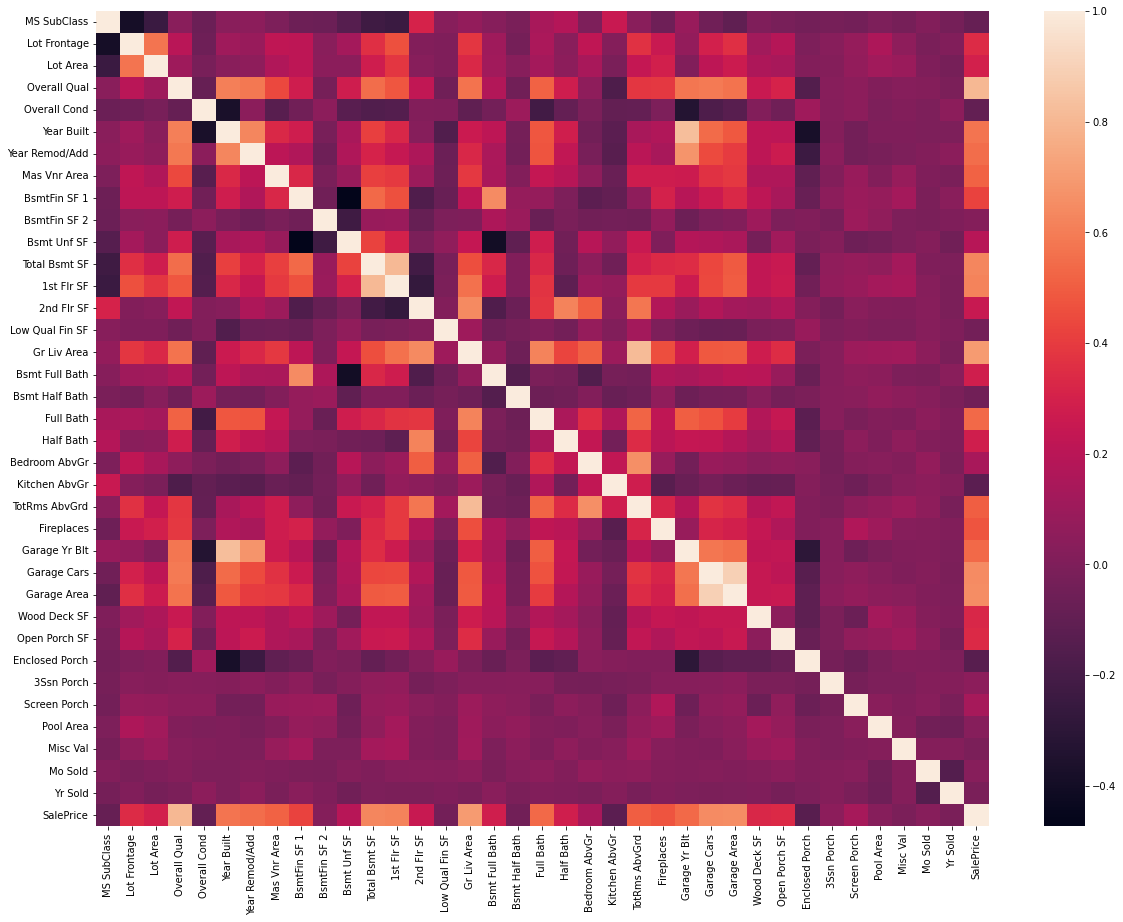

In [8]:
#Big messy heat map to get a general sense for correation landscape within the dataset:
plt.figure(figsize=(20,15))
sns.heatmap(train.iloc[:,2:81].corr());

- The above heatmap shows the following columns to be those with higher correlation values with SalePrice: Lot Frontage , Lot Area , Overall Qual, Year Built, Year Remod/Add, Mas Vnr Area, BsmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, 1st Flr SF, 2nd Flr SF, Gr Liv Area, Bsmt Full Bath, Full Bath, Half Bath, TotRms AbvGrd, Fireplaces, Garage Yr Blt, Garage Cars, Garage Area, Wood Deck SF, Open Porch SF.

In [10]:
#Descriptive statistics for training dataset:
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [11]:
#Neighborhoods sorted by most to least expensive:
train[['Neighborhood','SalePrice']].groupby('Neighborhood').mean().sort_values('SalePrice', ascending=False)

,SalePrice
Neighborhood,
StoneBr,329675.736842
NridgHt,322831.352459
NoRidge,316294.125000
GrnHill,280000.000000
Veenker,253570.588235
Timber,241051.354167
Somerst,227183.900000
ClearCr,217490.074074
Crawfor,205901.211268


In [12]:
#Zoning classification prices most to least:
train[['MS Zoning','SalePrice']].groupby('MS Zoning').mean().sort_values('SalePrice', ascending=False)

,SalePrice
MS Zoning,
FV,218618.316832
RL,191235.164581
RH,148859.571429
RM,129119.142405
C (all),78010.894737
I (all),57625.000000
A (agr),47300.000000


In [13]:
#Road access finish prices most to least:
train[['Street','SalePrice']].groupby('Street').mean().sort_values('SalePrice', ascending=False)

,SalePrice
Street,
Pave,181793.565558
Grvl,86901.428571


In [14]:
#Adjecency Conditions prices most to least:
train[['Condition 1','SalePrice']].groupby('Condition 1').mean().sort_values('SalePrice', ascending=False)

,SalePrice
Condition 1,
PosN,254794.296296
PosA,254733.333333
RRNn,198208.333333
Norm,185007.310130
RRAn,172604.777778
Feedr,143223.605505
RRAe,139685.714286
RRNe,129616.666667
Artery,128765.000000


In [15]:
#Building type prices most to least:
train[['Bldg Type','SalePrice']].groupby('Bldg Type').mean().sort_values('SalePrice', ascending=False)

,SalePrice
Bldg Type,
TwnhsE,198312.372671
1Fam,185275.685882
Duplex,139296.333333
Twnhs,133100.000000
2fmCon,123179.891304


In [16]:
#Overall Quality prices most to least:
train[['Overall Qual','SalePrice']].groupby('Overall Qual').mean().sort_values('SalePrice', ascending=False)

,SalePrice
Overall Qual,
10,417396.565217
9,370197.376623
8,271437.044000
7,203430.285383
6,162891.102767
5,134963.644760
4,107744.037736
3,81309.103448
2,51081.000000


In [17]:
#Overall Condition prices most to least: (5 is so out of place.)
train[['Overall Cond','SalePrice']].groupby('Overall Cond').mean().sort_values('SalePrice', ascending=False)

,SalePrice
Overall Cond,
5,207055.988870
9,198177.586207
8,155913.366337
7,155327.270370
6,148952.665761
4,114034.571429
3,99786.000000
2,65364.833333
1,59625.000000


In [20]:
#Roof Material prices most to least:
train[['Roof Matl','SalePrice']].groupby('Roof Matl').mean().sort_values('SalePrice', ascending=False)

,SalePrice
Roof Matl,
WdShngl,339400.000000
WdShake,264250.000000
Membran,241500.000000
Tar&Grv,187948.933333
CompShg,180849.197037
ClyTile,160000.000000


In [21]:
#Exterior material prices most to least:
train[['Exterior 1st','SalePrice']].groupby('Exterior 1st').mean().sort_values('SalePrice', ascending=False)

,SalePrice
Exterior 1st,
ImStucc,262000.000000
Stone,258500.000000
CemntBd,243429.088889
VinylSd,218174.082873
BrkFace,193055.093750
Plywood,170511.453947
HdBoard,159582.473333
WdShing,155616.822222
MetalSd,154402.048338


In [22]:
#Exterior quality prices most to least:
train[['Exter Qual','SalePrice']].groupby('Exter Qual').mean().sort_values('SalePrice', ascending=False)

,SalePrice
Exter Qual,
Ex,374460.308642
Gd,230802.484935
TA,143270.978348
Fa,89801.192308


In [23]:
#Foundation quality prices most to least:
train[['Foundation','SalePrice']].groupby('Foundation').mean().sort_values('SalePrice', ascending=False)

,SalePrice
Foundation,
PConc,227676.483801
Wood,173750.000000
CBlock,148415.530707
Stone,143235.200000
BrkTil,129050.190045
Slab,108810.676471


In [24]:
#Exterior quality prices most to least:
train[['Exter Qual','SalePrice']].groupby('Exter Qual').mean().sort_values('SalePrice', ascending=False)

,SalePrice
Exter Qual,
Ex,374460.308642
Gd,230802.484935
TA,143270.978348
Fa,89801.192308


In [25]:
#Basement Quality prices most to least:
train[['Bsmt Qual','SalePrice']].groupby('Bsmt Qual').mean().sort_values('SalePrice', ascending=False)

,SalePrice
Bsmt Qual,
Ex,329506.619565
Gd,202537.582176
TA,139988.461105
Fa,107752.166667
NA,106847.666667
Po,89000.000000


In [26]:
#Basement Finish prices most to least:
train[['BsmtFin Type 1','SalePrice']].groupby('BsmtFin Type 1').mean().sort_values('SalePrice', ascending=False)

,SalePrice
BsmtFin Type 1,
GLQ,237597.245528
Unf,166155.257048
ALQ,164368.017065
LwQ,153266.921569
BLQ,150107.020000
Rec,143263.382514
NA,106847.666667


In [27]:
#Heating System prices most to least:
train[['Heating QC','SalePrice']].groupby('Heating QC').mean().sort_values('SalePrice', ascending=False)

,SalePrice
Heating QC,
Ex,216027.607512
Gd,160174.009404
TA,138986.705193
Fa,117123.641791
Po,69033.333333


In [28]:
#Central Air prices most to least:
train[['Central Air','SalePrice']].groupby('Central Air').mean().sort_values('SalePrice', ascending=False)

,SalePrice
Central Air,
Y,187441.503665
N,100575.078014


In [30]:
#Full Bathrooms in Basement priced most to least: (3.0 throws off the weighting, only two rows with 3.0)
train[['Bsmt Full Bath','SalePrice']].groupby('Bsmt Full Bath').mean().sort_values('SalePrice', ascending=False)

,SalePrice
Bsmt Full Bath,
2.0,243402.739130
1.0,207226.669903
3.0,179000.000000
0.0,162599.682500


In [32]:
#Full Bathrooms above Grade prices most to least (Really weird and disordered rank):
train[['Full Bath','SalePrice']].groupby('Full Bath').mean().sort_values('SalePrice', ascending=False)


,SalePrice
Full Bath,
3,304609.155556
4,269500.000000
2,214600.614051
0,170226.000000
1,134870.961111


In [34]:
#Bedrooms above grade count prices most to least (Really weird and disordered rank): (So weird and disordered)
train[['Bedroom AbvGr','SalePrice']].groupby('Bedroom AbvGr').mean().sort_values('SalePrice', ascending=False)


,SalePrice
Bedroom AbvGr,
0,240791.800000
4,215374.792453
5,203885.951220
8,200000.000000
1,182388.920000
3,180627.309567
2,164656.601103
6,164111.333333


In [36]:
#Kitchen Quality prices most to least (Really weird and disordered rank): (So weird and disordered)
train[['Kitchen Qual','SalePrice']].groupby('Kitchen Qual').mean().sort_values('SalePrice', ascending=False)

,SalePrice
Kitchen Qual,
Ex,336424.463576
Gd,211629.451613
TA,139501.607450
Fa,101334.957447


In [37]:
#Home Functionality Kitchen Quality prices most to least (Really weird and disordered rank): (So weird and disordered)
train[['Functional','SalePrice']].groupby('Functional').mean().sort_values('SalePrice', ascending=False)

,SalePrice
Functional,
Typ,183954.749347
Maj1,163106.166667
Min1,154429.761905
Min2,150424.571429
Mod,148108.724138
Sev,95750.000000
Maj2,87157.714286
Sal,31550.000000


In [39]:
#Number of Fireplaces prices most to least (Really weird and disordered rank): (So weird and disordered)
train[['Fireplaces','SalePrice']].groupby('Fireplaces').mean().sort_values('SalePrice', ascending=False)

,SalePrice
Fireplaces,
4,260000.000000
2,239893.589041
3,234808.333333
1,215478.776169
0,142001.103000


In [40]:
#Car Size of Garage prices most to least (Really weird and disordered rank): (So weird and disordered)
train[['Garage Cars','SalePrice']].groupby('Garage Cars').mean().sort_values('SalePrice', ascending=False)

,SalePrice
Garage Cars,
3.0,309382.745247
4.0,229653.846154
2.0,184125.956866
1.0,126824.591603
5.0,126500.000000
0.0,105669.150442


In [43]:
#Driveway condition prices most to least (Really weird and disordered rank): (So weird and disordered)
train[['Paved Drive','SalePrice']].groupby('Paved Drive').mean().sort_values('SalePrice', ascending=False)

,SalePrice
Paved Drive,
Y,188792.163890
P,129824.461538
N,104562.827815


In [45]:
#Value counts show that most listings have no pool:
train['Pool Area'].value_counts()

0      2042
519       1
576       1
800       1
228       1
480       1
648       1
738       1
368       1
561       1
Name: Pool Area, dtype: int64

In [46]:
#Pool Quality prices most to least (Really weird and disordered rank): (So weird and disordered)
train[['Pool QC','SalePrice']].groupby('Pool QC').mean().sort_values('SalePrice', ascending=False)

,SalePrice
Pool QC,
Ex,315000.000000
Gd,216492.500000
Fa,215500.000000
NA,181341.522037
TA,141500.000000


In [48]:
#Month Sold prices most to least (Really weird and disordered rank): (So weird and disordered)
train[['Mo Sold','SalePrice']].groupby('Mo Sold').mean().sort_values('SalePrice', ascending=False)

,SalePrice
Mo Sold,
1,195126.303797
9,188990.761468
7,188571.514851
8,186927.359281
11,184377.495146
6,182662.798295
12,182459.615385
5,180332.369650
10,179334.471545


In [50]:
#Year Sold prices most to least (Really weird and disordered rank): (So weird and disordered)
train[['Yr Sold','SalePrice']].groupby('Yr Sold').mean().sort_values('SalePrice', ascending=False)

,SalePrice
Yr Sold,
2007,185524.514056
2009,182455.244395
2008,181750.372414
2006,179471.609589
2010,174180.059829


In [51]:
#Sale Condition prices most to least (Really weird and disordered rank): (So weird and disordered)
train[['Sale Type','SalePrice']].groupby('Sale Type').mean().sort_values('SalePrice', ascending=False)

,SalePrice
Sale Type,
New,279021.056250
Con,241807.500000
ConLI,207992.857143
CWD,186635.000000
WD,174912.251544
COD,133574.523810
ConLD,129091.352941
Oth,127497.750000
ConLw,124600.000000


In [52]:
#Homes over 4000 sqft(TOTAL):
train['total_sf'] = train['Gr Liv Area'] + train['Total Bsmt SF']
train[['Id','1st Flr SF','2nd Flr SF','Gr Liv Area','Total Bsmt SF', 'total_sf']][(train['total_sf'])  > 4000]

,Id,1st Flr SF,2nd Flr SF,Gr Liv Area,Total Bsmt SF,total_sf
30,380,2524,0,2524,2524.0,5048.0
41,2383,2076,0,2076,2076.0,4152.0
52,2351,1392,1392,2784,1392.0,4176.0
81,367,2234,0,2234,2216.0,4450.0
99,2450,1358,1368,2726,1342.0,4068.0
...,...,...,...,...,...,...
1934,458,2200,0,2200,2200.0,4400.0
1939,1307,1675,1818,3493,1470.0,4963.0
1964,1638,2338,0,2338,2660.0,4998.0
1965,2593,1392,1248,2640,2171.0,4811.0


In [53]:
#Homes over 3500 sq ft above grade:
train[['Id','1st Flr SF','2nd Flr SF','Gr Liv Area','Total Bsmt SF']][(train['Gr Liv Area'])  > 3500]

,Id,1st Flr SF,2nd Flr SF,Gr Liv Area,Total Bsmt SF
616,1498,3820,0,3820,0.0
960,1499,4692,950,5642,6110.0
1035,2667,1518,1518,3608,1107.0
1885,2181,5095,0,5095,5095.0
1897,2738,1836,1836,3672,1836.0


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# EXPLORATORY VISUALIZATION:

Below are a set of distribution plots, box plots, correlation plots, and pair plots breaking down the features into arbitrary subsets to check for correlation with Sale Price.

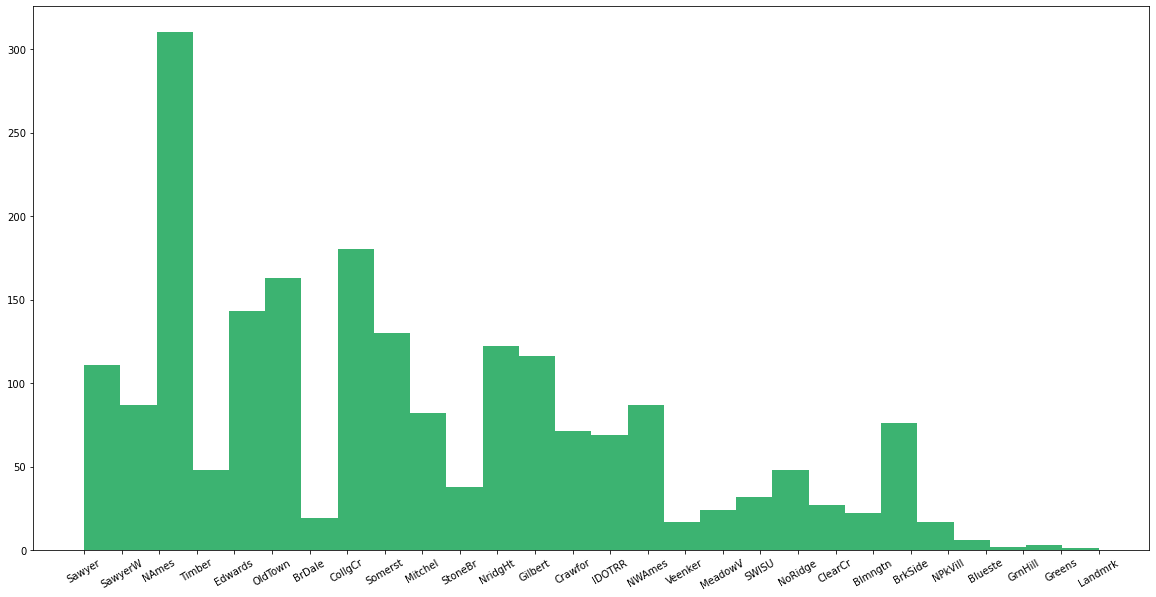

In [56]:
#Exploratory Distribution plot for listings by neighborhood:
plt.figure(figsize=(20,10))
plt.hist(train['Neighborhood'], bins=28, color='mediumseagreen');
plt.xticks(rotation=30);

- Histogram showing that some neighborhoods have many homes being sold while others do not. 

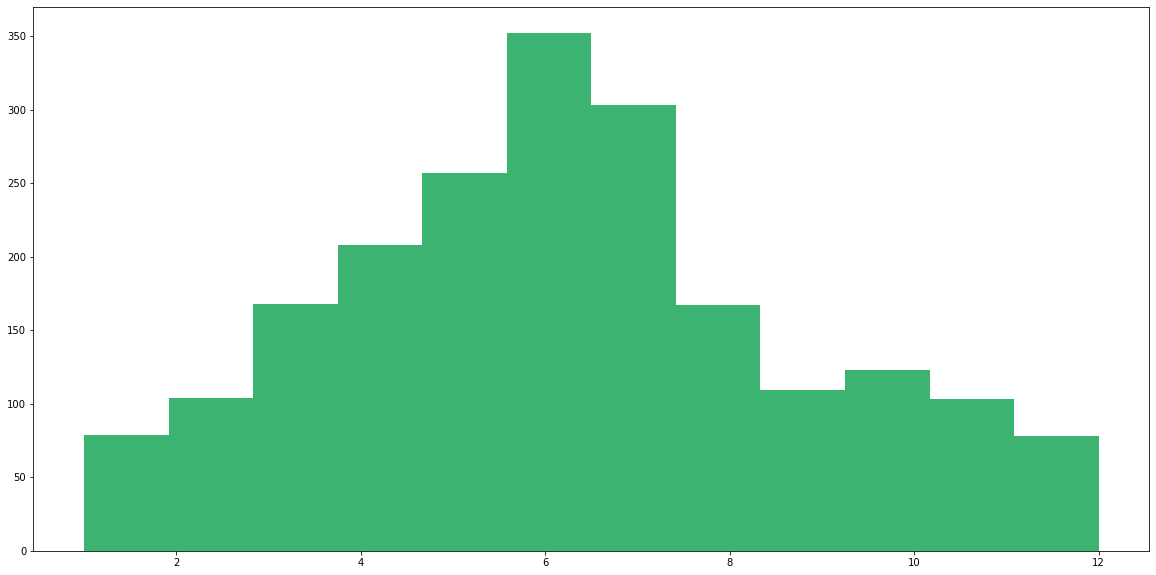

In [330]:
#Exploratory Distribution plot for listings by month sold:
plt.figure(figsize=(20,10))
plt.hist(train['Mo Sold'], bins=12, color='mediumseagreen');

- Histogram showing most homes are sold in early summer.

In [ ]:
# #Uninteresting Distribution Plots of Building Type, Roof Material, Exterior Material, Exterior Material Quality,...
# #Foundation Type, Heating Quality, Central Air Conditioning, Kitchen Quality, Paved Driveway, Sale Type,...
# #MS Zoning, and Street:
# plt.hist(train['Condition 1'], bins=18, color='mediumseagreen');
# plt.hist(train['Bldg Type'], bins=10, color='mediumseagreen');
# plt.figure(figsize=(10,5))
# plt.hist(train['Roof Matl'], bins=20, color='mediumseagreen');
# plt.figure(figsize=(10,5))
# plt.hist(train['Exterior 1st'], bins=20, color='mediumseagreen');
# plt.xticks(rotation=30);
# plt.figure(figsize=(10,5))
# plt.hist(train['Exter Qual'], bins=8, color='mediumseagreen');
# plt.figure(figsize=(10,5))
# plt.hist(train['Foundation'], bins=12, color='mediumseagreen');
# plt.hist(train['Heating QC'], bins=10, color='mediumseagreen');
# plt.hist(train['Central Air'], bins=2, color='mediumseagreen');
# plt.hist(train['Kitchen Qual'], bins=8, color='mediumseagreen');
# plt.hist(train['Paved Drive'], bins=5, color='mediumseagreen');
# plt.hist(train['Sale Type'], bins=20, color='mediumseagreen');
# plt.hist(train['MS Zoning'], bins=8, color='salmon');
# plt.hist(train['Street'], bins=2, color='salmon');

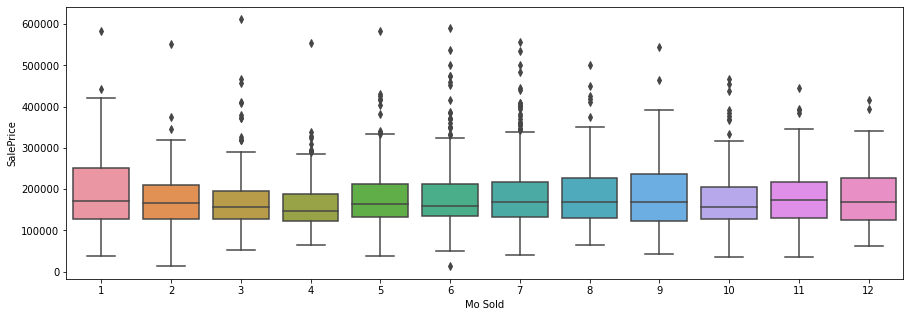

In [336]:
#Exploratory Box plot of Sale Prices by Month Sold:
plt.figure(figsize=(15,5))
sns.boxplot(x=train['Mo Sold'],y=train['SalePrice']);

- Box plot showing that different months sold have both varying distributions, ranges, and heights when it comes to home sale prices. Distributions appear to be widest and highest in mid winter and late summer.

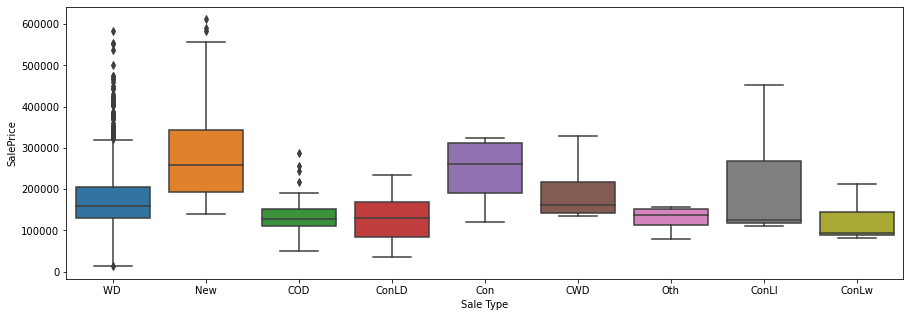

In [337]:
#Exploratory Box plot of Sale Prices by Sale Type:
plt.figure(figsize=(15,5))
sns.boxplot(x=train['Sale Type'],y=train['SalePrice']);

- Box plot showing that different sale types have both varying distributions, ranges, and heights when it comes to home sale prices.

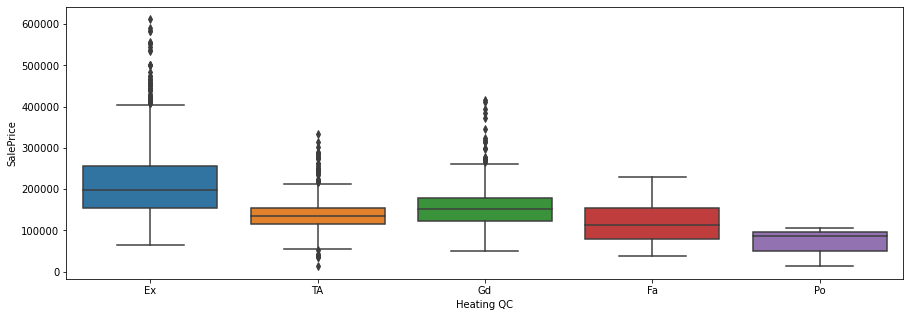

In [335]:
#Exploratory Box plot of Sale Prices by Heating Quality:
plt.figure(figsize=(15,5))
sns.boxplot(x=train['Heating QC'],y=train['SalePrice']);

- Box plot showing that different heating system qualities have both varying distributions, ranges, and heights when it comes to home sale prices.

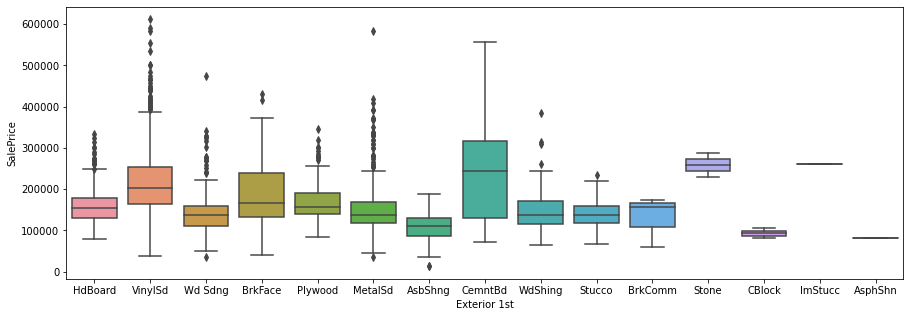

In [334]:
#Exploratory Box plot of Sale Prices by Exterior Material:
plt.figure(figsize=(15,5))
sns.boxplot(x=train['Exterior 1st'],y=train['SalePrice']);

- Box plot showing that different exterior materials have both varying distributions, ranges, and heights when it comes to home sale prices.

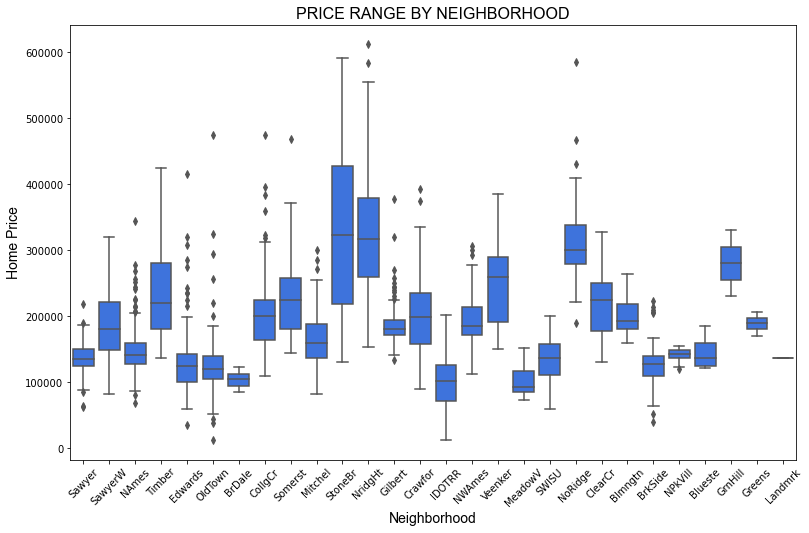

In [270]:
#Exploratory Box plot of Sale Prices by Neighborhood:
plt.figure(figsize=(13,8))
sns.boxplot(x=train['Neighborhood'],y=train['SalePrice'], color='#246bf6');
plt.title('PRICE RANGE BY NEIGHBORHOOD', fontsize = 16, fontname='Arial');
plt.ylabel("Home Price", fontsize=14, fontname='Arial')
plt.xlabel("Neighborhood", fontsize=14, fontname='Arial')
plt.xticks(rotation=45);
plt.savefig('./visualizations/neighborhood_price.jpg')

- Box plot showing that different neighborhoods have both varying distributions, ranges, and heights when it comes to home sale prices.
<br><br><br><br>

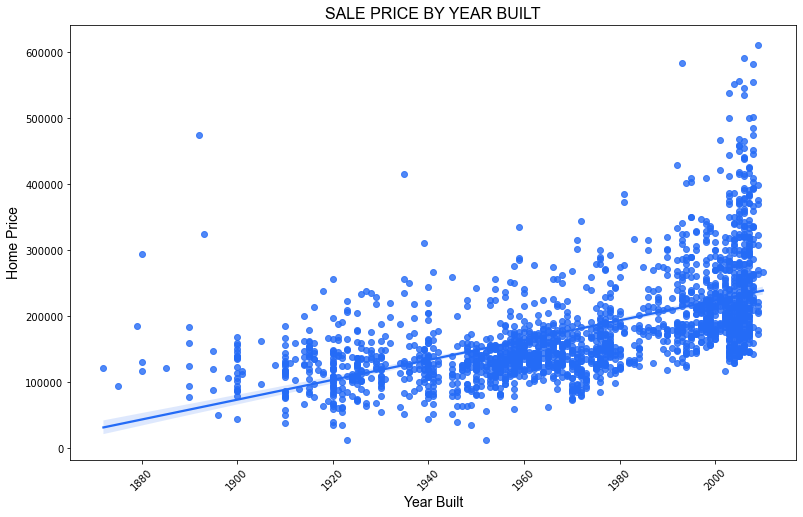

In [327]:
#Exploratory Scatter plot of Sale Prices by Year Built:
plt.figure(figsize=(13,8))
sns.regplot(x=train['Year Built'],y=train['SalePrice'], color='#246bf6');
plt.title('SALE PRICE BY YEAR BUILT', fontsize = 16, fontname='Arial');
plt.ylabel("Home Price", fontsize=14, fontname='Arial')
plt.xlabel("Year Built", fontsize=14, fontname='Arial')
plt.xticks(rotation=45);
plt.savefig('./visualizations/year_built_price.jpg')

- Scatter plot showing that as home age decreases, home price increases.
- This show positive linear correlation, but also likely logarithmic correlation as well. 
<br><br><br><br>

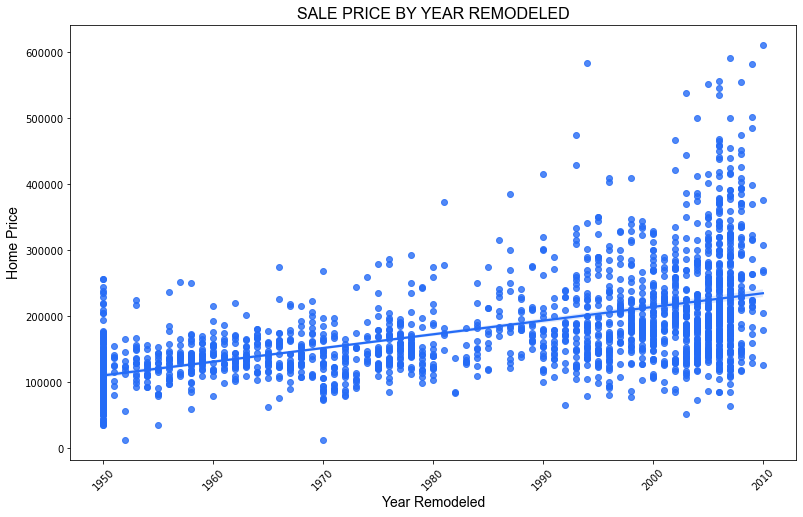

In [272]:
#Exploratory Scatter plot of Sale Prices by Year Remodeled:
plt.figure(figsize=(13,8))
sns.regplot(x=train['Year Remod/Add'],y=train['SalePrice'], color='#246bf6');
plt.title('SALE PRICE BY YEAR REMODELED', fontsize = 16, fontname='Arial');
plt.ylabel("Home Price", fontsize=14, fontname='Arial')
plt.xlabel("Year Remodeled", fontsize=14, fontname='Arial')
plt.xticks(rotation=45);
plt.savefig('./visualizations/year_remod_price.jpg')

- Scatter plot showing that as age of remodeling work decreases, home price increases.
- This show again shows positive linear correlation, but also likely logarithmic correlation as well. 
<br><br><br><br>

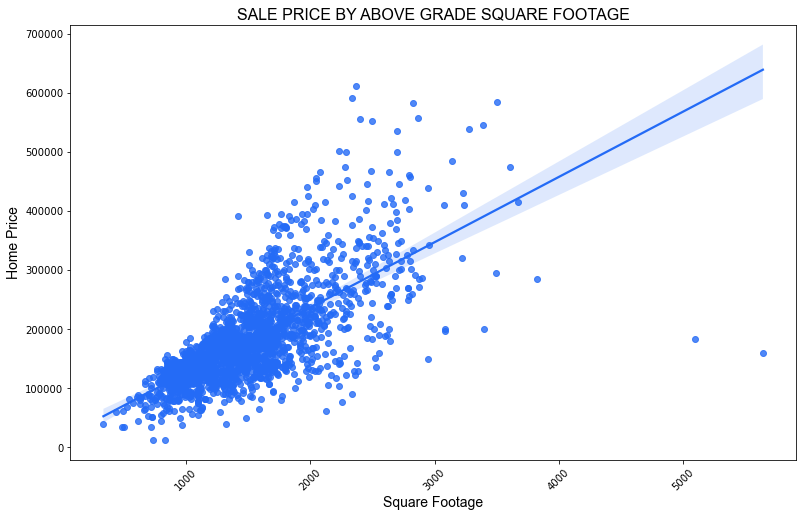

In [273]:
#Exploratory Scatter plot of Sale Prices by Square Footage above grade:
plt.figure(figsize=(13,8))
sns.regplot(x=train['Gr Liv Area'],y=train['SalePrice'], color='#246bf6');
plt.title('SALE PRICE BY ABOVE GRADE SQUARE FOOTAGE', fontsize = 16, fontname='Arial');
plt.ylabel("Home Price", fontsize=14, fontname='Arial')
plt.xlabel("Square Footage", fontsize=14, fontname='Arial')
plt.xticks(rotation=45);
plt.savefig('./visualizations/sf_price.jpg')

- Scatterplot showing strong heteroscedastic positive correlation between square footage and home price.
- There are two notable outliers with square footage over 4000 sqft. These are eventually removed later for modeling.
<br><br><br><br>

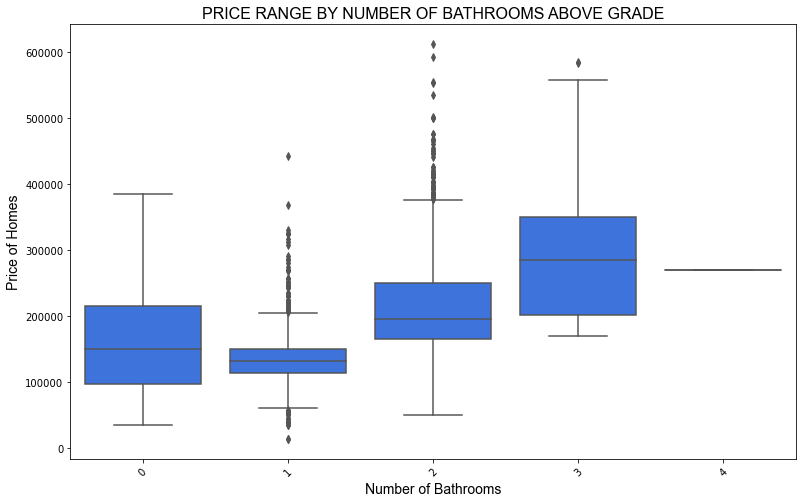

In [274]:
#Exploratory box plot of Sale Prices by Number of Bathrooms:
plt.figure(figsize=(13,8))
sns.boxplot(x=train['Full Bath'],y=train['SalePrice'], color='#246bf6');
plt.title('PRICE RANGE BY NUMBER OF BATHROOMS ABOVE GRADE', fontsize = 16, fontname='Arial');
plt.ylabel("Price of Homes", fontsize=14, fontname='Arial')
plt.xlabel("Number of Bathrooms", fontsize=14, fontname='Arial')
plt.xticks(rotation=45);
plt.savefig('./visualizations/bath_price.jpg')

- Box plot showing that homes with different numbers of bathrooms have both varying distributions, ranges, and heights when it comes to home sale prices.
- Home price appears to increase as number of bathrooms increases up to 3.
<br><br><br><br>

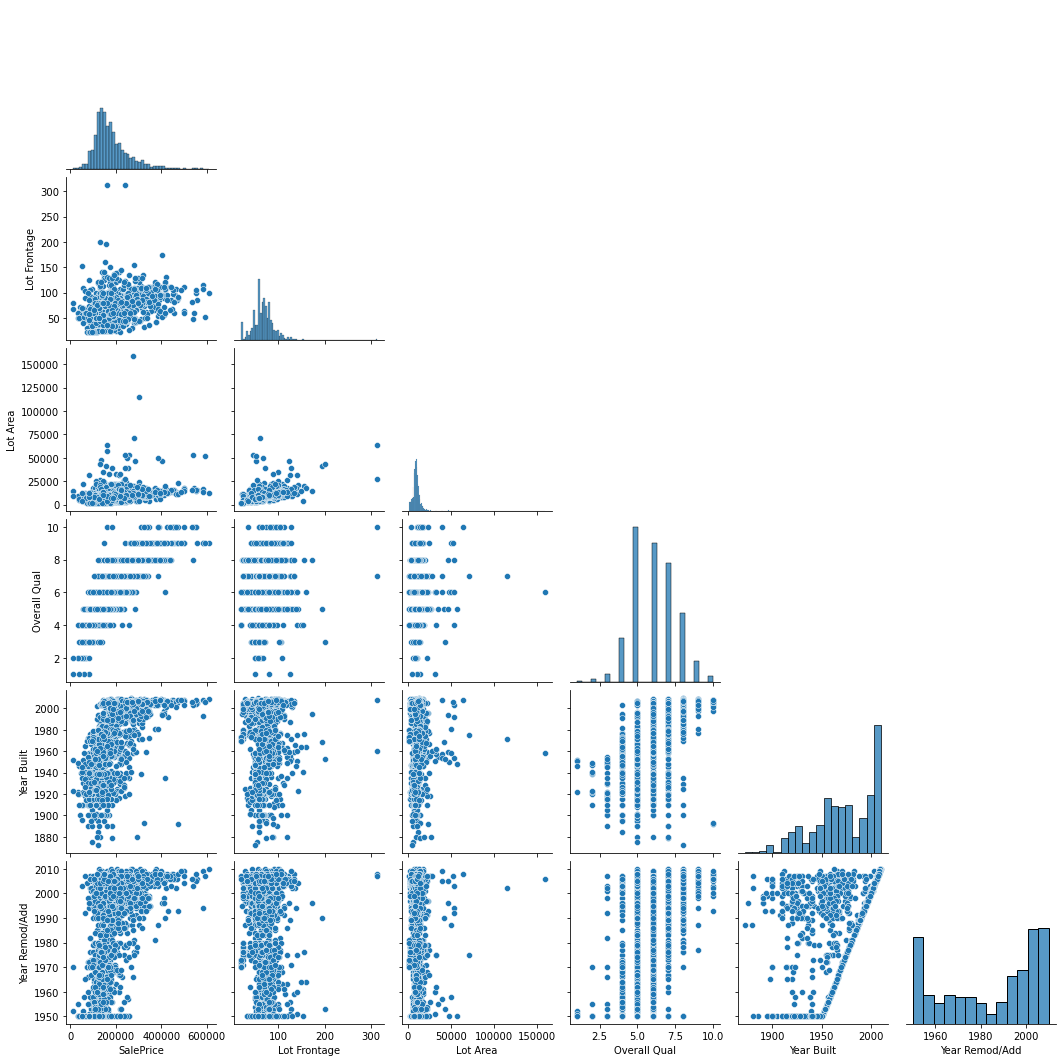

In [76]:
#Exploratory Pairplot 01:
sns.pairplot(train[['SalePrice','Lot Frontage','Lot Area','Overall Qual','Year Built','Year Remod/Add']],corner = True);

-Notable correlation between Sale Price and Lot Frontage, Year Built, and Year Remodeled.

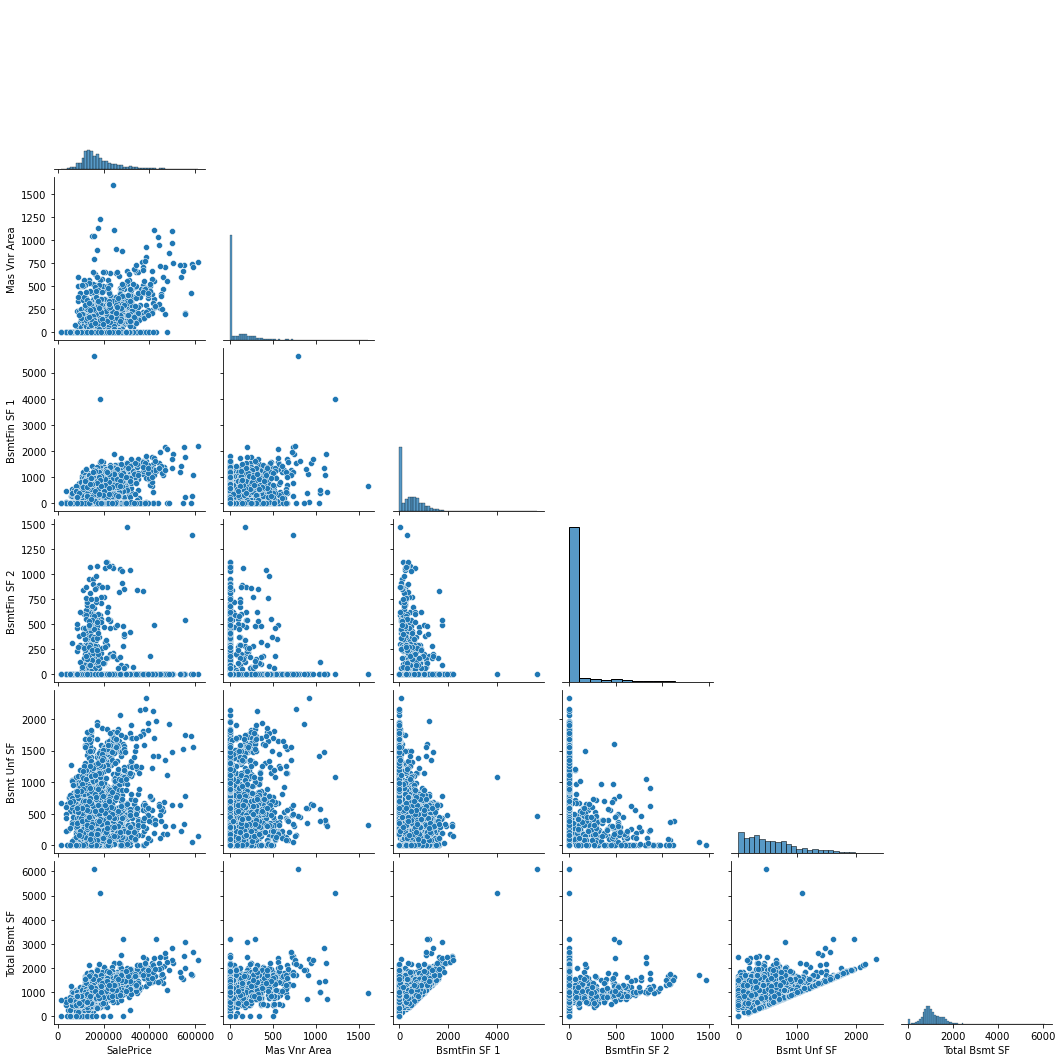

In [77]:
#Exploratory Pairplot 02:
sns.pairplot(train[['SalePrice','Mas Vnr Area','BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF']],corner = True);

- Notable correlation between sale price and Total Basement Square footage and Finished Basement Square Footage

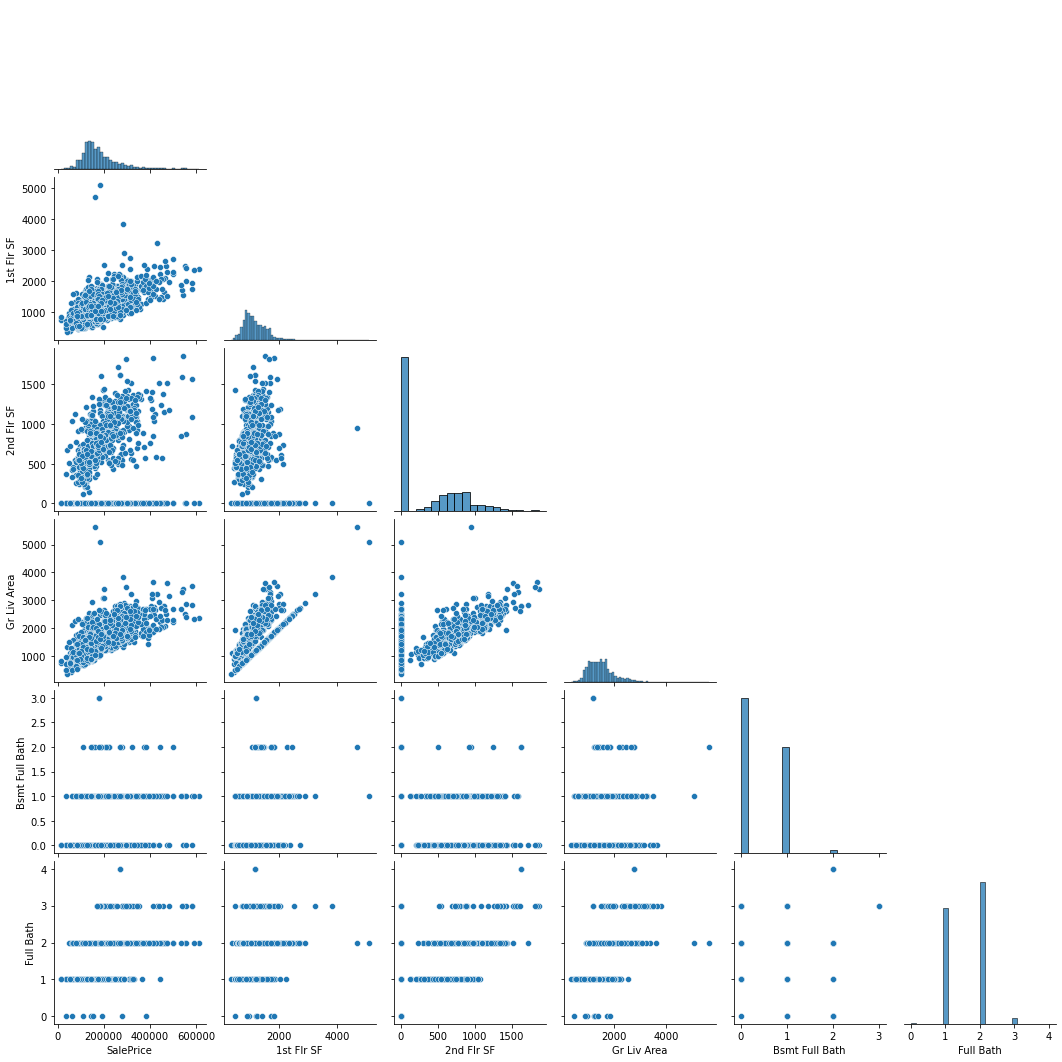

In [78]:
#Exploratory Pairplot 03:
sns.pairplot(train[['SalePrice','1st Flr SF','2nd Flr SF','Gr Liv Area','Bsmt Full Bath','Full Bath']],corner = True);

- Notable correlation between sale price and living area above grade and square footage on 1st and 2nd floor.

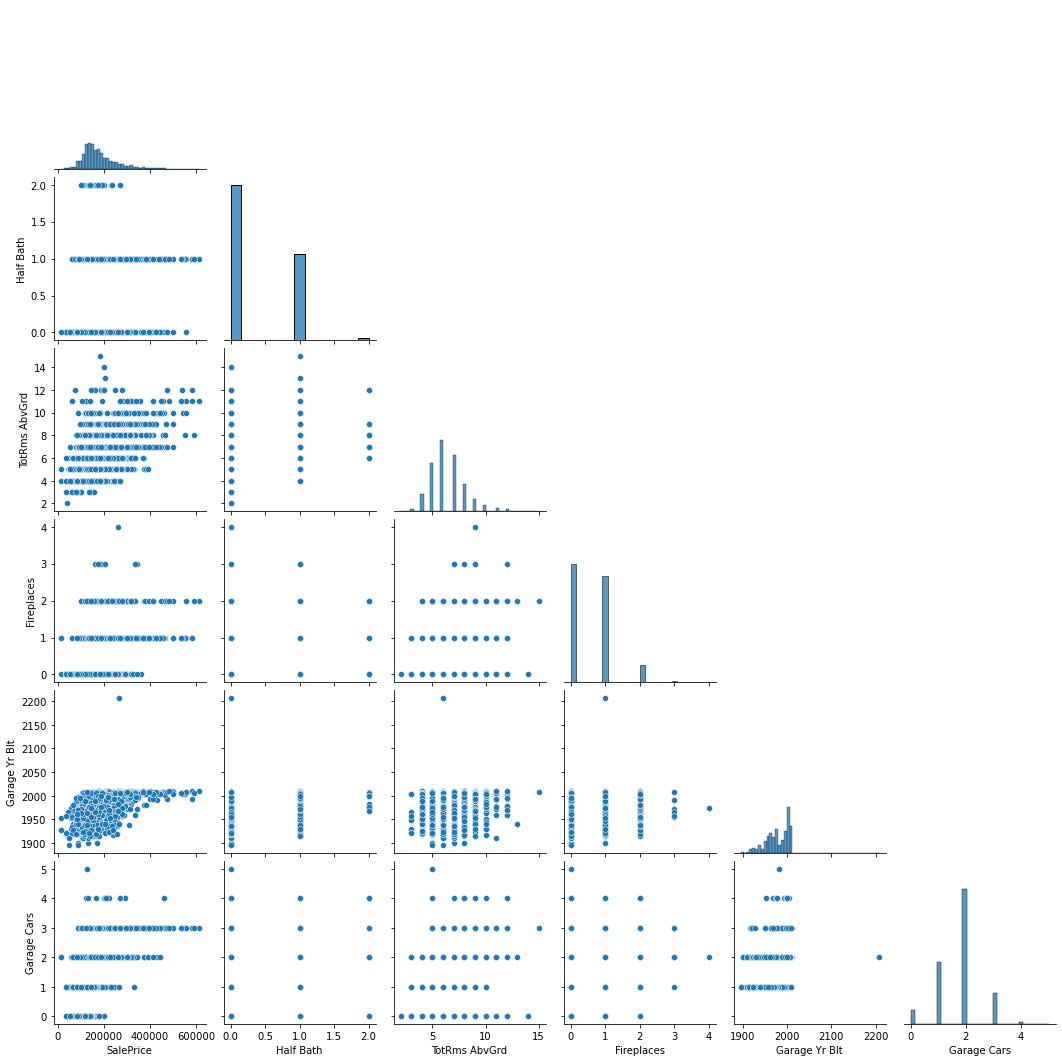

In [79]:
#Exploratory Pairplot 04:
sns.pairplot(train[['SalePrice','Half Bath','TotRms AbvGrd','Fireplaces','Garage Yr Blt','Garage Cars']],corner = True);

- Notable outlier in Garage Year built, showing a garage built over 100 years from now in the future.

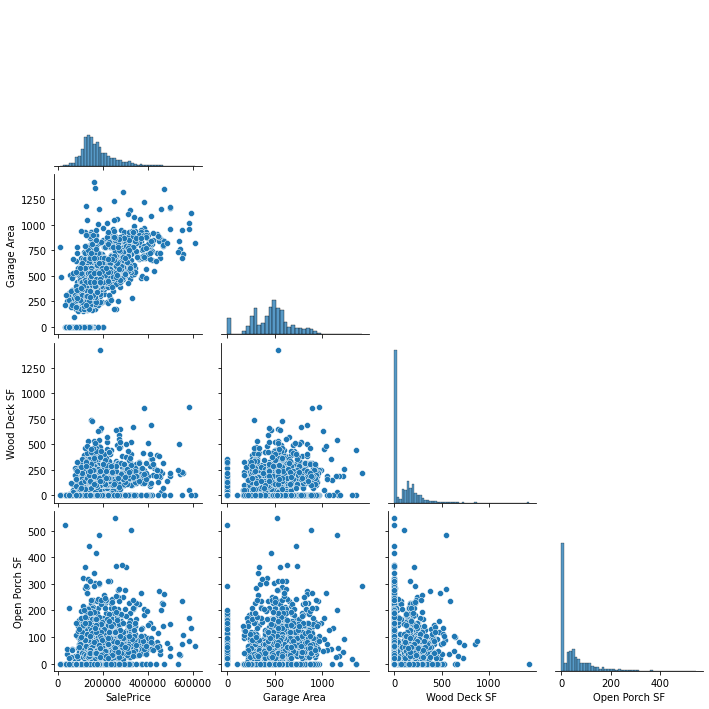

In [81]:
#Exploratory Pairplot 05:
sns.pairplot(train[['SalePrice','Garage Area','Wood Deck SF','Open Porch SF']],corner = True);

- Lackluster correlation of any features here. 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# DATA CLEANING:

Below is the code for the data cleaning portion of this project. 
- Some outliers made sense to remove or edit for modeling.<br>
- There were some basement and wood deck square footage outliers, but nothing unbelievable.<br>
- There was a garage built year outlier, saying the garage was built in 2200. This was removed.<br>
- The data dictionary suggests removing all homes with more than 4000 sq feet(5 homes), but instead I removed homes over 3500 square feet above grade. This removed at least 4 outlier homes.<br>


Total Square Footage is a column that was created by the above EDA. For model purposes this column is not needed. I let PolynomialFeatures do the rest.<br>

Garage size in cars and sq ft could have been be a good interaction term and year built and year remodeled could also have been an interesting interaction term, but instead of isolating out individual interaction terms, I will blanket use polynomial features, and ElasticNet after that.


In [121]:
#Obviously not built in the future, but possibly 2007?:
train[['Id','Garage Yr Blt']][train['Garage Yr Blt'] > 2022]

,Id,Garage Yr Blt
1699,2261,2207.0


In [122]:
#Looking for the homes with square footage over 4000 that the data dictionary mentions:
train[['Id','Gr Liv Area', 'Total Bsmt SF', 'SalePrice']][train['Gr Liv Area'] > 3500]

,Id,Gr Liv Area,Total Bsmt SF,SalePrice
616,1498,3820,0.0,284700
960,1499,5642,6110.0,160000
1035,2667,3608,1107.0,475000
1885,2181,5095,5095.0,183850
1897,2738,3672,1836.0,415000


In [123]:
#Removing the four homes over 3500 Above Ground square feet:
train_cleaned = train.loc[train["Gr Liv Area"] <= 3500 ]

In [124]:
#Looking for remaining nulls to identify which should be cleaned and which must be imputed later:
train_cleaned.isnull().sum().sort_values(ascending = False).loc[lambda x: x >0]

Lot Frontage      330
Garage Yr Blt     114
Mas Vnr Type       22
Mas Vnr Area       22
Bsmt Exposure       4
BsmtFin Type 2      2
Garage Cars         1
Garage Finish       1
Bsmt Qual           1
Bsmt Cond           1
BsmtFin Type 1      1
Garage Qual         1
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Half Bath      1
Garage Area         1
total_sf            1
Garage Cond         1
Bsmt Full Bath      1
dtype: int64

In [125]:
#Removing 3 rows with null values that removed the bulk of the null values:
train_cleaned.dropna(subset=['Garage Cond'], inplace=True)
train_cleaned.dropna(subset=['Bsmt Full Bath'], inplace=True)
train_cleaned.isnull().sum().sort_values(ascending = False).loc[lambda x: x >0]

/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Lot Frontage      330
Garage Yr Blt     113
Mas Vnr Type       22
Mas Vnr Area       22
Bsmt Exposure       3
BsmtFin Type 2      1
dtype: int64

In [338]:
#The remaining columns of interest with null values are Lot Frontage and Garage Year Built:
#With these I feel it will make the most sense to use SimpleImputer on these later to replace null values with the following means:
train_cleaned['Lot Frontage'].mean(), train_cleaned['Garage Yr Blt'].mean()

(68.83372228704783, 1978.6897980321078)

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# PRE-PROCESSING AND MODELING:
- One-hot encode categorical variables.
- Train/test split your data.
- Scale your data as needed.
- Consider using automated feature selection.
- **Establish your baseline score.**
- Fit linear regression. Look at your coefficients. Are any of them wildly overblown?
- Fit lasso/ridge/elastic net with default parameters.
- Go back and remove features that might be causing issues in your models.
- Tune hyperparameters.
- **Identify a production model.** (This does not have to be your best performing Kaggle model, but rather the model that best answers your problem statement.)
- Refine and interpret your production model.

In [133]:
#Defining X and y, Train-Test-Splitting, and checking the shape of the resulting splits:
X2 = train_cleaned[['Lot Frontage','Lot Area', 'Neighborhood', 'Condition 1',  'Bldg Type', 'Overall Qual','Year Built',
                    'Year Remod/Add','Roof Matl','Exterior 1st','Exter Qual','Foundation','Bsmt Qual','BsmtFin Type 1',
                    'BsmtFin SF 1', 'Total Bsmt SF',  'Heating QC', 'Central Air','1st Flr SF','2nd Flr SF','Garage Yr Blt',
                    'Gr Liv Area','Full Bath','Bedroom AbvGr','Kitchen Qual', 'Functional','Fireplaces',
                    'Garage Cars', 'Garage Area','Paved Drive','Mo Sold','Sale Type']]
y2 = train_cleaned['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X2,y2,test_size = 0.2, random_state = 123)
X_train.shape, X_test.shape

In [136]:
#Defining lists of numeric columns, instantiating column transformer, and instantiating polynomial features:
numeric = [col for col in X2._get_numeric_data().columns if col not in ['Id', 'PID', 'SalePrice']]
ohe = ColumnTransformer([('si', SimpleImputer(missing_values=np.nan, strategy='mean'), numeric),
                        ('ohe', OneHotEncoder(handle_unknown = 'ignore'), ['Neighborhood','Condition 1', 'Bldg Type', 'Exterior 1st',
                                  'Exter Qual','Roof Matl','Foundation','Bsmt Qual','BsmtFin Type 1', 'Heating QC', 
                                'Central Air','Kitchen Qual','Functional','Paved Drive','Mo Sold','Sale Type'])],
                              remainder="passthrough", verbose_feature_names_out=False)
poly = PolynomialFeatures(degree = 2, interaction_only = False, include_bias = False)

In [139]:
#Establishing Baseline Score:
null_preds = np.full_like(y_test, y2.mean())
r2_score(y_test, null_preds)

-0.004171206507399106

In [141]:
# #Linear Regression is a bad fit:
# pipe = make_pipeline(ohe, poly, StandardScaler(with_mean=False), LinearRegression()) 
# pipe.fit(X_train,y_train)
# pipe.score(X_train, y_train), pipe.score(X_test, y_test), len(pipe.named_steps['linearregression'].coef_)  #WAY OVERFIT

In [142]:
# #Ridge is a bad fit:
# pipe2 = make_pipeline(ohe, poly, StandardScaler(with_mean=False), Ridge()) 
# pipe2.fit(X_train,y_train)
# pipe2.score(X_train, y_train), pipe2.score(X_test, y_test), len(pipe2.named_steps['ridge'].coef_)

In [143]:
# #Lasso is also a bad fit:
# pipe3 = make_pipeline(ohe, poly, StandardScaler(with_mean=False), Lasso()) 
# pipe3.fit(X_train,y_train)
# pipe3.score(X_train, y_train), pipe3.score(X_test, y_test),len(pipe3.named_steps['lasso'].coef_)

In [144]:
#Pipe4 (ElasticNet()) with l1_ratiom of 0.975 is the best fit so far. It converges only after 2000 iterations:
pipe4 = make_pipeline(ohe, poly, StandardScaler(with_mean=False), ElasticNetCV(max_iter=2000, l1_ratio=0.975, n_jobs=-1)) 

In [145]:
#Fitting pipe4 to training set (CAN TAKE A LONG TIME):
pipe4.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('si', SimpleImputer(),
                                                  ['Lot Frontage', 'Lot Area',
                                                   'Overall Qual', 'Year Built',
                                                   'Year Remod/Add',
                                                   'BsmtFin SF 1',
                                                   'Total Bsmt SF',
                                                   '1st Flr SF', '2nd Flr SF',
                                                   'Garage Yr Blt',
                                                   'Gr Liv Area', 'Full Bath',
                                                   'Bedroom AbvGr',
                                                   'Fireplaces', 'Garage Cars',
                                                   'Garage Area', 'Mo Sold']),
            

In [146]:
#Returns of list of R2 score on train set, test set, number of coefficients, and intercept:
pipe4.score(X_train, y_train), pipe4.score(X_test, y_test), len(pipe4.named_steps['elasticnetcv'].coef_),pipe4.named_steps['elasticnetcv'].intercept_

(0.9670111848110964, 0.9172417507437753, 10730, -72224.16183062358)

In [147]:
#Shows first 10 coefficient values:
pipe4.named_steps['elasticnetcv'].coef_[:10]

array([112.85989475, 185.90463704, 627.65555522, 209.32336645,
       492.84275764, 285.19785399, 391.73934012, 508.91079437,
       279.72374837,  23.51549277])

In [148]:
#Defining y_preds for training and test set with best model:
y_preds = pipe4.predict(X_train)
y_preds_test = pipe4.predict(X_test)
#Returning MAE score for train and test set with best model:
mean_absolute_error(y_train,y_preds),mean_absolute_error(y_test,y_preds_test)

(9790.002030261086, 14714.413305439724)

In [149]:
#SECOND MODEL -- LARGEST SET (All columns execpt for 7 with single features that were messing up modeling)...
#Defining X and y and Train-Test-Splitting...
#Defining lists of numeric columns, instantiating new column transformer, and new instantiating polynomial features:
X3 = train_cleaned.drop(columns = ['total_sf','Utilities','Condition 2','Exterior 2nd','Bsmt Qual', 'Electrical',
                                   'Pool QC','Misc Feature', 'Id', 'PID','SalePrice'])
y3 = train_cleaned['SalePrice']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X3,y3, test_size = 0.2, random_state = 123)
numeric = [col for col in X_train2._get_numeric_data().columns]
categorical = [col for col in X_train2.columns if col not in numeric]
ohe2 = ColumnTransformer([('si', SimpleImputer(missing_values=np.nan, strategy='mean'), numeric),
                        ('ohe', OneHotEncoder(handle_unknown = 'ignore'), categorical)],
                              remainder="passthrough", verbose_feature_names_out=False)
poly2 = PolynomialFeatures(degree = 2, interaction_only = False, include_bias = False)
#Pipe5 produces a model from most supplied features, but will not converge any higher than l1 ratio of .90:
pipe5 = make_pipeline(ohe2, poly2, StandardScaler(with_mean=False), ElasticNetCV(max_iter=1500, l1_ratio=0.90, n_jobs=-1)) 

In [150]:
#Fitting pipe5 to new training set (CAN TAKE A LONG TIME):
pipe5.fit(X_train2,y_train2)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('si', SimpleImputer(),
                                                  ['MS SubClass',
                                                   'Lot Frontage', 'Lot Area',
                                                   'Overall Qual',
                                                   'Overall Cond', 'Year Built',
                                                   'Year Remod/Add',
                                                   'Mas Vnr Area',
                                                   'BsmtFin SF 1',
                                                   'BsmtFin SF 2',
                                                   'Bsmt Unf SF',
                                                   'Total Bsmt SF',
                                                   '1st Flr SF', '2nd Flr SF',
                                                   'L

In [151]:
#Returns of list of R2 score on train set, test set, and number of coefficients:
pipe5.score(X_train2, y_train2),pipe5.score(X_test2, y_test2),len(pipe4.named_steps['elasticnetcv'].coef_)

(0.9693157738438717, 0.889974084021809, 10730)

In [152]:
#Defining y_preds for training and test set with larger weaker model:
y_preds2 = pipe5.predict(X_train2)
y_preds_test2 = pipe5.predict(X_test2)
#Returning MAE score for train and test set with larger weaker model:
mean_absolute_error(y_train2,y_preds2),mean_absolute_error(y_test,y_preds_test2)

(9318.520374537875, 14775.899426386544)

<br>
<br>
<br>
<br>
<br>
<br>
<br>

# VISUALIZING ERRORS:

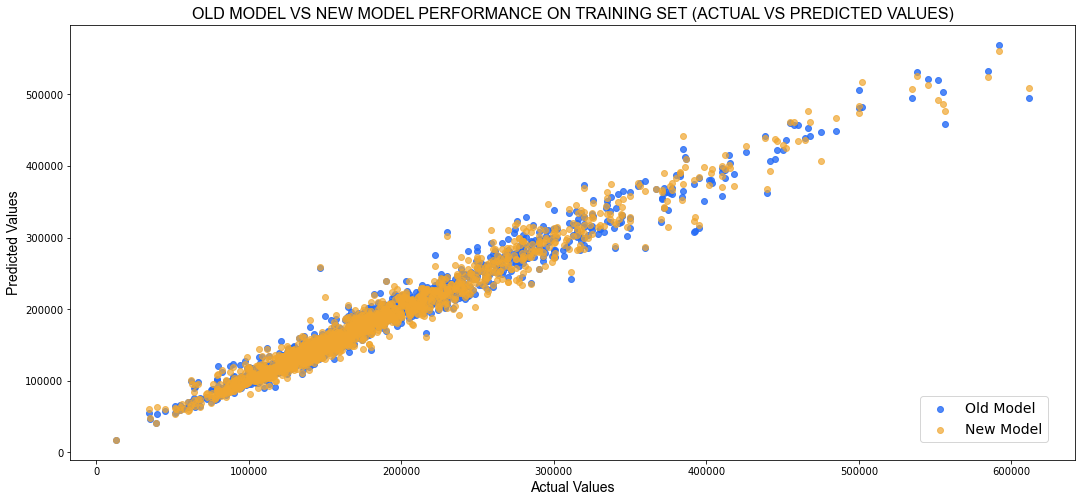

In [382]:
#Scatter plot comparing both models in terms of correlation between actual values and predicted values, with training set:
plt.figure(figsize=(18,8))
plt.scatter(y_train2, y_preds2, color='#246bf6', alpha=0.8, label = 'Old Model');
plt.scatter(y_train, y_preds, color='#f0a62f', alpha=0.7, label = 'New Model');
plt.title('OLD MODEL VS NEW MODEL PERFORMANCE ON TRAINING SET (ACTUAL VS PREDICTED VALUES)', fontsize = 16, fontname='Arial');
plt.ylabel("Predicted Values", fontsize=14, fontname='Arial');
plt.xlabel("Actual Values", fontsize=14, fontname='Arial');
plt.legend(bbox_to_anchor=(.98,.025), loc='lower right', fontsize=14);
plt.savefig('./visualizations/r2_train.png', transparent=True)

- Here, 97% (train) of the variability of our target feature is explained in the New Model.
- Here, 97% (train) of the variability of our target feature is explained in the Old Model.
- This scatter plot shows the strong linearity between the predicted and actual values of both models when working with the training data. 
- Both models are performing very well
- This is to be expected.
- There are very few significant outliers.
<br><br><br><br><br><br><br><br>

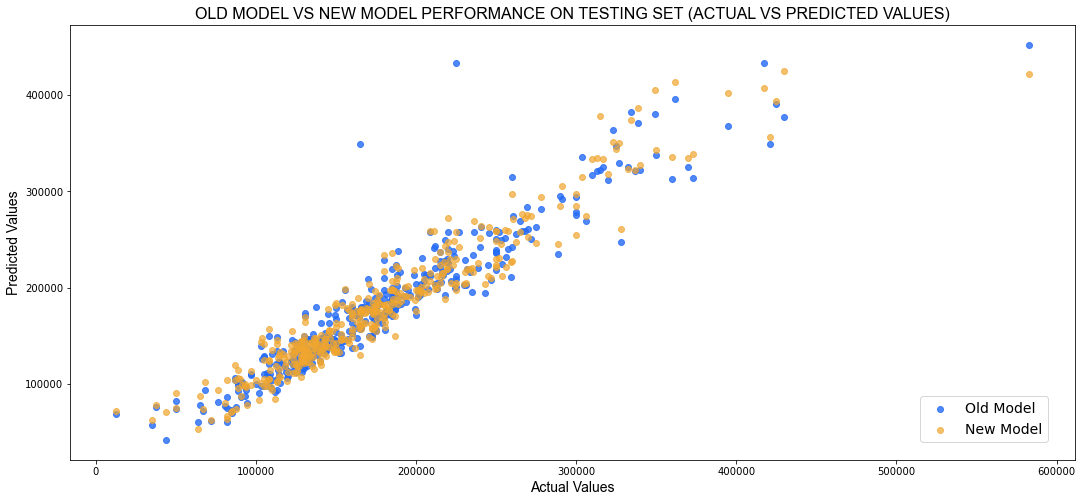

In [381]:
#Scatter plot comparing both models in terms of correlation between actual values and predicted values, with test set:
plt.figure(figsize=(18,8))
plt.scatter(y_test2, y_preds_test2, color='#246bf6', alpha=0.8, label = 'Old Model');
plt.scatter(y_test, y_preds_test, color='#f0a62f', alpha=0.7, label = 'New Model');
plt.title('OLD MODEL VS NEW MODEL PERFORMANCE ON TESTING SET (ACTUAL VS PREDICTED VALUES)', fontsize = 16, fontname='Arial');
plt.ylabel("Predicted Values", fontsize=14, fontname='Arial');
plt.xlabel("Actual Values", fontsize=14, fontname='Arial');
plt.legend(bbox_to_anchor=(.98,.025), loc='lower right', fontsize=14);
plt.savefig('./visualizations/r2_test.png', transparent=True)

- Here, 92% (test) of the variability of our target feature is explained in the New Model.
- Here, 89% (test) of the variability of our target feature is explained in the Old Model.
- This scatter plot again shows the strong linearity between the predicted and actual values of both models, but instead with the testing data.
- This is less expected.
- Both models are performing well, but the old model shows a number of significant outliers, while the new model shows maybe one. 
- Here, the new model is performing just as well as the old, if not better.
<br><br><br><br><br><br><br><br>

In [277]:
#Defining residuals of both models on training and test sets:
residuals_train = y_train - y_preds
residuals_test = y_test - y_preds_test
residuals_train2 = y_train2 - y_preds2
residuals_test2 = y_test2 - y_preds_test2

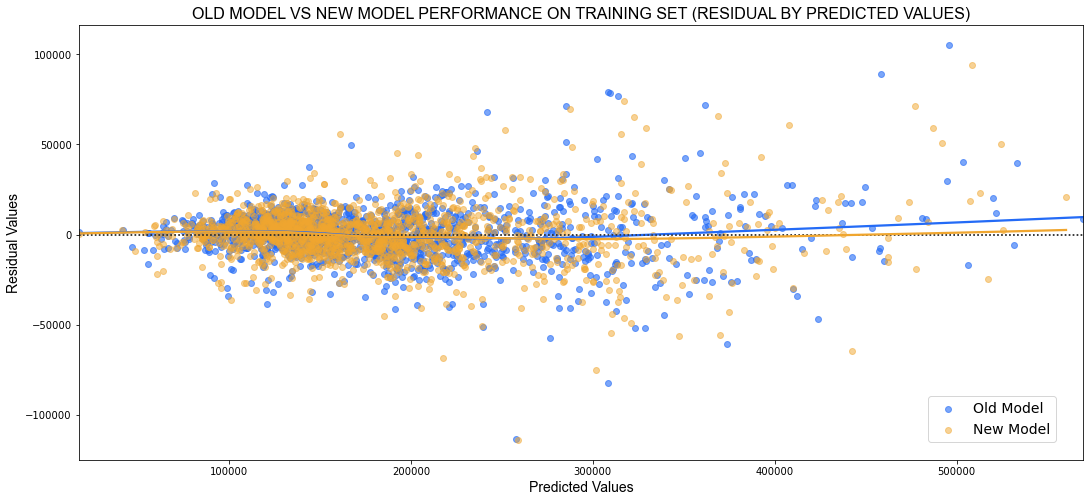

In [380]:
#Residual plot comparing both models in terms of correlation between residual values and predicted values, with training set:
plt.figure(figsize=(18,8))
sns.residplot(x = y_preds2, y = residuals_train2, color='#246bf6', label = 'Old Model',
              lowess = True, line_kws = {'color':'#246bf6'},scatter_kws={'alpha':0.6})
sns.residplot(x = y_preds, y = residuals_train, color='#f0a62f', label = 'New Model',
              lowess = True, line_kws = {'color':'#f0a62f'}, scatter_kws={'alpha':0.5})
plt.title('OLD MODEL VS NEW MODEL PERFORMANCE ON TRAINING SET (RESIDUAL BY PREDICTED VALUES)', fontsize = 16, fontname='Arial');
plt.ylabel("Residual Values", fontsize=14, fontname='Arial');
plt.xlabel("Predicted Values", fontsize=14, fontname='Arial');
plt.legend(bbox_to_anchor=(.98,.025), loc='lower right', fontsize=14);
plt.savefig('./visualizations/fit_train.png', transparent=True)

- Here, 97% (train) of the variability of our target feature is explained in the New Model.
- Here, 97% (train) of the variability of our target feature is explained in the Old Model.
- This residual plot shows the size of the errors or residual values of the models by predicted value in the training data. 
- Here it is clear that up to $200,000, the models perform excellently, but after this point both models show increasing error and increased heteroscedasticity out away from pure accuracy.
- Despite this departure from homoscedasticity, these errors remains evenly distributed enough that their normalization remains remarkably close to 0.
-Here, the older model appears to show slightly more error than the new model. 
<br><br><br><br><br><br><br><br>

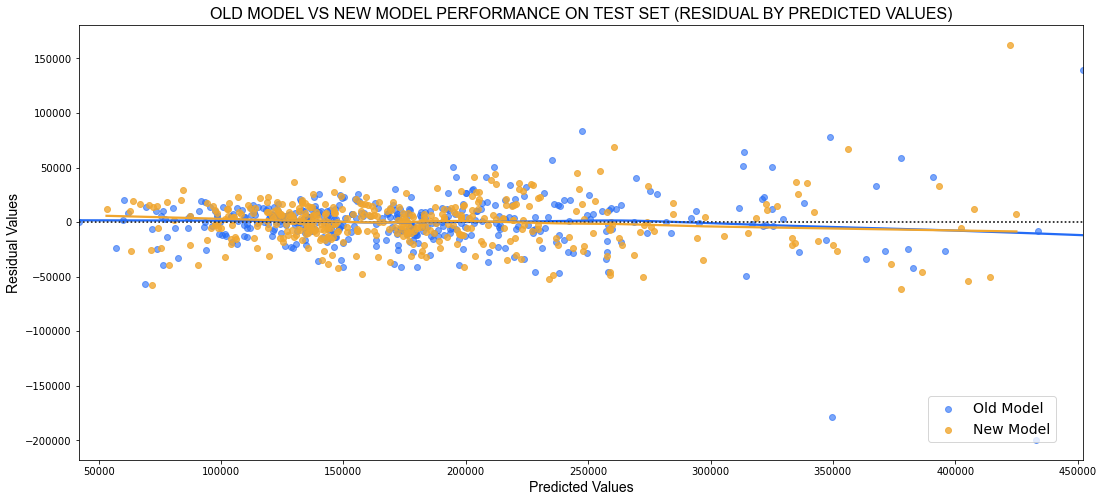

In [379]:
#Residual plot comparing both models in terms of correlation between residual values and predicted values, with test set:
plt.figure(figsize=(18,8))
sns.residplot(x = y_preds_test2, y = residuals_test2, color='#246bf6', label = 'Old Model',
           lowess = True, line_kws = {'color':'#246bf6'},scatter_kws={'alpha':0.6})
sns.residplot(x = y_preds_test, y = residuals_test, color='#f0a62f', label = 'New Model',
              lowess = True, line_kws = {'color':'#f0a62f'},scatter_kws={'alpha':0.8})
plt.title('OLD MODEL VS NEW MODEL PERFORMANCE ON TEST SET (RESIDUAL BY PREDICTED VALUES)', fontsize = 16, fontname='Arial');
plt.ylabel("Residual Values", fontsize=14, fontname='Arial');
plt.xlabel("Predicted Values", fontsize=14, fontname='Arial');
plt.legend(bbox_to_anchor=(.98,.025), loc='lower right', fontsize=14);
plt.savefig('./visualizations/fit_test.png', transparent=True)

- Here, 92% (test) of the variability of our target feature is explained in the New Model.
- Here, 89% (test) of the variability of our target feature is explained in the Old Model.
- This residual plot shows the size of the errors or residual values of the models by predicted value in the test data. 
- Here it is clear, again, that up to $200,000, the models perform excellently, but after this point both models show increasing error and increased heteroscedasticity out away from pure accuracy, but nowhere near as much as with the testing data.
- Despite this departure from homoscedasticity, these errors remains evenly distributed enough that their normalization remains remarkably close to 0.
-Here, the older model appears to show slightly more outliers than the new model. 
<br><br><br><br><br><br><br><br>

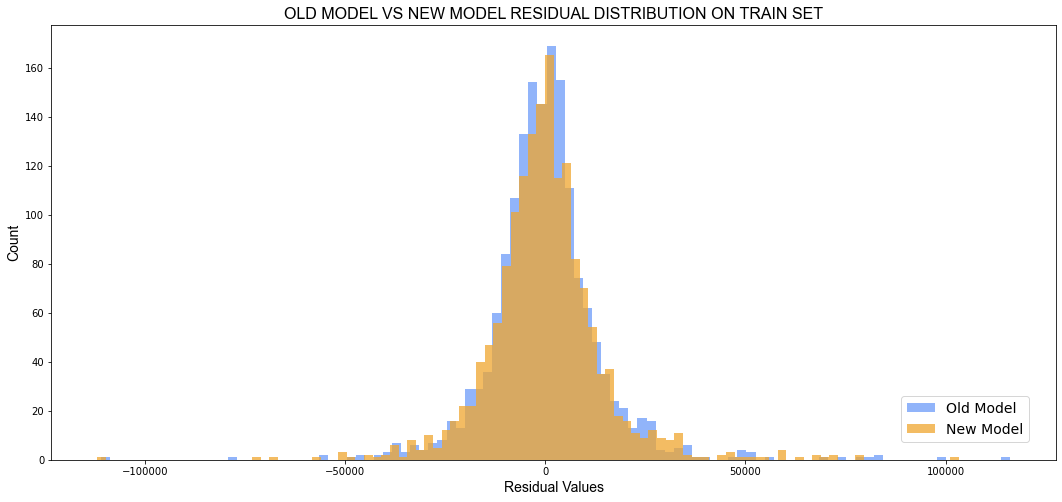

In [378]:
#Plot comparing both models in terms of distribution of residual values with training set:
plt.figure(figsize=(18,8))
plt.hist(residuals_train2, bins = 100, color='#246bf6', alpha=0.5, label = 'Old Model');
plt.hist(residuals_train, bins = 100, color='#f0a62f',alpha=0.75, label = 'New Model');
plt.title('OLD MODEL VS NEW MODEL RESIDUAL DISTRIBUTION ON TRAIN SET', fontsize = 16, fontname='Arial');
plt.ylabel("Count", fontsize=14, fontname='Arial');
plt.xlabel("Residual Values", fontsize=14, fontname='Arial');
plt.legend(bbox_to_anchor=(.98,.025), loc='lower right', fontsize=14);
plt.savefig('./visualizations/res_dist_train.png', transparent=True)

- Here, 97% (train) of the variability of our target feature is explained in the New Model.
- Here, 97% (train) of the variability of our target feature is explained in the Old Model.
- This plot shows the distribution of errors for both models when it comes to making predictions from the training data. 
- The steepness of the distribution confirms the strong performance of both models. 
- Both models appear to perform almost identically, but perhaps the new model performs slightly better. 
<br><br><br><br><br><br><br><br>

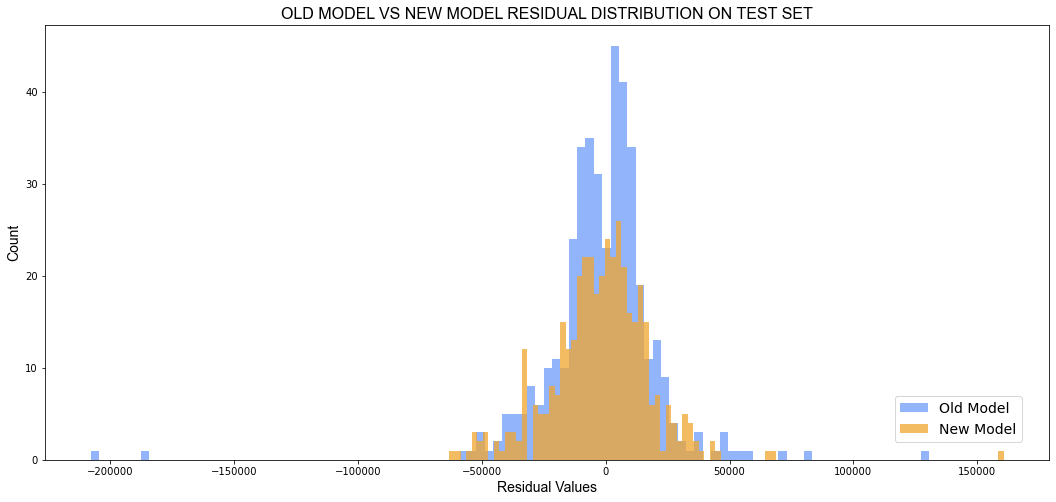

In [376]:
#Plot comparing both models in terms of distribution of residual values with test set:
plt.figure(figsize=(18,8))
plt.hist(residuals_test2, bins = 100, color='#246bf6', alpha=0.5, label = 'Old Model');
plt.hist(residuals_test, bins = 100, color='#f0a62f',alpha=0.75, label = 'New Model');
plt.title('OLD MODEL VS NEW MODEL RESIDUAL DISTRIBUTION ON TEST SET', fontsize = 16, fontname='Arial');
plt.ylabel("Count", fontsize=14, fontname='Arial');
plt.xlabel("Residual Values", fontsize=14, fontname='Arial');
plt.legend(bbox_to_anchor=(.98,.025), loc='lower right', fontsize=14);
plt.savefig('./visualizations/res_dist_test.png', transparent=True)

- Here, 92% (test) of the variability of our target feature is explained in the New Model.
- Here, 89% (test) of the variability of our target feature is explained in the Old Model.
- This plot shows the distribution of errors for both models when it comes to making predictions from the testing data. 
- The hollowness of the old models distribution is strange, as if the bulk of the errors are not quite near zero but not too far from it either. 
- Either way, with a significantly lower peak, the distribution of the new model appears to show that it vastly out performs the old model in terms of returning less error.
<br><br><br><br><br><br><br><br>

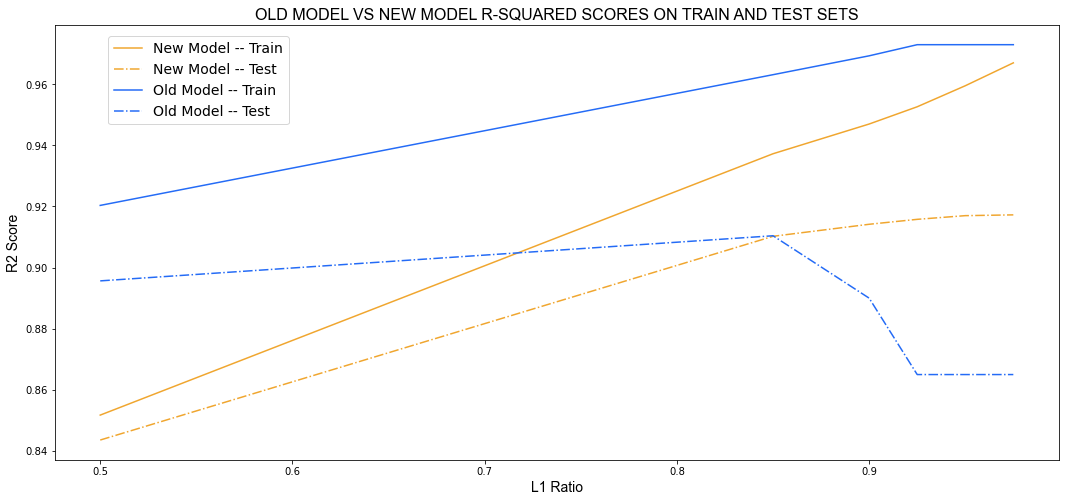

In [375]:
#Line Plot Comparing both models peformance across increasing L1 Ratios:
xs_train = [0.5,0.85,0.9,0.925,0.95,0.975]
ys_train = [0.8516845000473221,0.9372548231156507,0.9469858318419088,0.9526341609897511,0.9595147341085163,0.9670111848110964]
xs_test = [0.5,0.85,0.9,0.925,0.95,0.975]
ys_test = [0.8435213451853988,0.910225315389847,0.9141625734535351,0.9157778417577562,0.9169839470102082,0.9172417507437753]
xl_train = [0.5,0.85,0.9,0.925,0.95,0.975]
yl_train = [0.9203401609299647,0.9631384252572102,0.9693157738438717,0.9729611571184826,0.9729611571184826,0.9729611571184826]
xl_test = [0.5,0.85,0.9,0.925,0.95,0.975]
yl_test = [0.8956299277185933,0.9104031859575619,0.889974084021809,0.8649594554943114,0.8649594554943114,0.8649594554943114]
plt.figure(figsize=(18,8))
plt.plot(xs_train, ys_train, color='#f0a62f', label = 'New Model -- Train');
plt.plot(xs_test, ys_test, color='#f0a62f', linestyle='dashdot', label = 'New Model -- Test');
plt.plot(xl_train, yl_train, color='#246bf6', label = 'Old Model -- Train');
plt.plot(xl_test, yl_test, color='#246bf6', linestyle='dashdot', label = 'Old Model -- Test');
plt.title('OLD MODEL VS NEW MODEL R-SQUARED SCORES ON TRAIN AND TEST SETS', fontsize = 16, fontname='Arial');
plt.ylabel("R2 Score", fontsize=14, fontname='Arial');
plt.xlabel("L1 Ratio", fontsize=14, fontname='Arial');
plt.legend(bbox_to_anchor=(.24,.99), loc='upper right', fontsize=14);
plt.savefig('./visualizations/r2_line.png', transparent=True)

- Finally this line plot shows the performance of both models as the L1 ratio is increased. 
- Up until an L1 Ratio of .85 both models appear to increase in accuracy, but after this point not so much.
- The new model continues to gradually increase in performance on both training and test data up to a L1 ratio of .975.
- The old models training set performance increases, but its testing set performance drops indicating overfitting.
- Furthermore, the old model failed to converge in a timely manner after an L1 ratio of .925, otherwise these lines may have dropped even further.
- Here, the new model clearly outperforms the older larger weaker model.

<br>
<br>
<br>
<br>
<br>
<br>
<br>

# BUSINESS RECOMMENDATIONS:

- The model with half the features performs just as well, even better, than a model with all features.
- This improved performance can be measured in slight improvements in the R2 score and MSE of model with less features. 
- The model with less features also reaches convergence more easily and will less iterations than the more featured model.
- Zill-uh-oh should be able to proceed confidently in lessening the number of questions on their surveys to hopefully improve response and completion rates of surveys.

<br>
<br>
<br>
<br>
<br>
<br>
<br>

# SUBMISSION:

In [222]:
#Setting X from test set for submission predictions for both models:
s_test = test[['Lot Frontage','Lot Area', 'Neighborhood', 'Condition 1',  'Bldg Type', 'Overall Qual','Year Built',
                    'Year Remod/Add','Roof Matl','Exterior 1st','Exter Qual','Foundation','Bsmt Qual','BsmtFin Type 1',
                    'BsmtFin SF 1', 'Total Bsmt SF',  'Heating QC', 'Central Air','1st Flr SF','2nd Flr SF','Garage Yr Blt',
                    'Gr Liv Area','Full Bath','Bedroom AbvGr','Kitchen Qual', 'Functional','Fireplaces',
                    'Garage Cars', 'Garage Area','Paved Drive','Mo Sold','Sale Type']]
s2_test = test.drop(columns = ['Utilities','Condition 2','Exterior 2nd','Bsmt Qual', 'Electrical',
                                   'Pool QC','Misc Feature', 'Id', 'PID'])

In [199]:
#Creating submission file for first (best) model:
y_preds_s_test = pipe4.predict(s_test)
test['SalePrice'] = y_preds_s_test
submission = test[['Id','SalePrice']]
submission.to_csv('../project-2/datasets/submission_01.csv', index=False) #Index must be false or else Kaggle will not allow submission. 

In [223]:
#Creating submission file for second (larger/weaker) model:
y_preds_s_test2 = pipe5.predict(s2_test)
test['SalePrice'] = y_preds_s_test2
submission = test[['Id','SalePrice']]
submission.to_csv('../project-2/datasets/submission_02.csv', index=False)